In [17]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry
import shapely
import rasterio
import rioxarray
from rasterio.features import shapes
from shapely.geometry import shape
import matplotlib.pyplot as plt
from pathlib import Path

from shapely import affinity
from shapely.geometry.multipolygon import MultiPolygon
from scipy.spatial import Voronoi

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float32 ...
    SI_Wind    (lat, lon) float32 ...
    AVA_Wind   (lat, lon) float32 ...
    AVA_Solar  (lat, lon) float32 ...


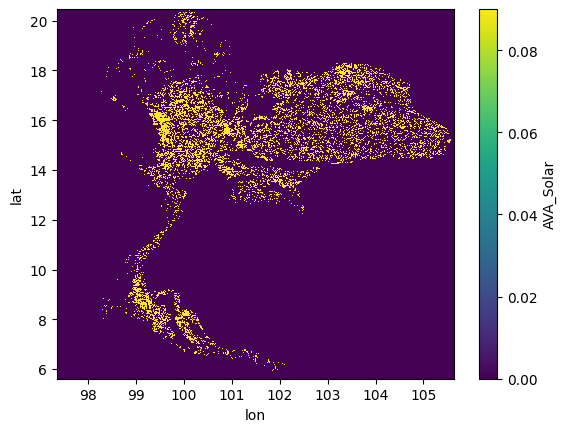

In [18]:
xr_final_SI = xr.open_dataset('Output\\xr_final_SI_beforeFRA.nc')
print(xr_final_SI)

xr_final_SI['AVA_Solar'].plot()

In [19]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
thailandmap['center'] = thailandmap['geometry'].centroid
thailandmap = thailandmap.drop(columns=['Shape_Leng',
                                        'Shape_Area',
                                        'ADM1_PCODE',
                                        'ADM1_REF',
                                        'ADM1ALT1EN',
                                        'ADM1ALT2EN',
                                        'ADM1ALT1TH',
                                        'ADM1ALT2TH',
                                        'ADM0_EN',
                                        'ADM0_TH',
                                        'ADM0_PCODE',
                                        'date',
                                        'validOn',
                                        'validTo',
                                        'geometry'
                                        ])

thailandmap = thailandmap.set_geometry('center')
print(thailandmap)

                     ADM1_EN          ADM1_TH                      center
0                    Bangkok    กรุงเทพมหานคร  POINT (100.62353 13.77183)
1               Samut Prakan      สมุทรปราการ  POINT (100.71024 13.59651)
2                 Nonthaburi          นนทบุรี  POINT (100.39282 13.92416)
3               Pathum Thani         ปทุมธานี  POINT (100.68241 14.06513)
4   Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา  POINT (100.52662 14.34535)
..                       ...              ...                         ...
72                     Trang             ตรัง    POINT (99.59447 7.54462)
73               Phatthalung           พัทลุง   POINT (100.06948 7.51586)
74                   Pattani          ปัตตานี   POINT (101.34978 6.73053)
75                      Yala             ยะลา   POINT (101.22851 6.19086)
76                Narathiwat         นราธิวาส   POINT (101.71888 6.17754)

[77 rows x 3 columns]


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_26184\492017770.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailandmap['center'] = thailandmap['geometry'].centroid


In [20]:
df_final_SI = xr_final_SI.to_dataframe()
df_final_SI.reset_index(inplace=True)
df_final_SI = gpd.GeoDataFrame(df_final_SI, geometry =gpd.points_from_xy(df_final_SI['lon'],df_final_SI['lat']))
df_final_SI.crs = {'init': 'epsg:4326'}
df_final_SI['center'] = df_final_SI['geometry'].centroid
df_final_SI = df_final_SI.drop(columns='geometry')

df_final_SI = df_final_SI.set_geometry('center')
df_final_SI.reset_index(inplace=True,drop= False)

print(df_final_SI)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_26184\2441567167.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_final_SI['center'] = df_final_SI['geometry'].centroid


             index        lat         lon  SI_Solar  SI_Wind  AVA_Wind  \
0                0   5.615278   97.345833       0.0      0.0       0.0   
1                1   5.615278   97.348611       0.0      0.0       0.0   
2                2   5.615278   97.351389       0.0      0.0       0.0   
3                3   5.615278   97.354167       0.0      0.0       0.0   
4                4   5.615278   97.356944       0.0      0.0       0.0   
...            ...        ...         ...       ...      ...       ...   
15957805  15957805  20.462500  105.623611       0.0      0.0       0.0   
15957806  15957806  20.462500  105.626389       0.0      0.0       0.0   
15957807  15957807  20.462500  105.629167       0.0      0.0       0.0   
15957808  15957808  20.462500  105.631944       0.0      0.0       0.0   
15957809  15957809  20.462500  105.634722       0.0      0.0       0.0   

          AVA_Solar                      center  
0               0.0    POINT (97.34583 5.61528)  
1          

In [21]:
df_final_SI_2 = gpd.sjoin_nearest(df_final_SI,thailandmap,how='left')
df_final_SI_2 = df_final_SI_2.drop_duplicates('index')
print(df_final_SI_2)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


             index        lat         lon  SI_Solar  SI_Wind  AVA_Wind  \
0                0   5.615278   97.345833       0.0      0.0       0.0   
1                1   5.615278   97.348611       0.0      0.0       0.0   
2                2   5.615278   97.351389       0.0      0.0       0.0   
3                3   5.615278   97.354167       0.0      0.0       0.0   
4                4   5.615278   97.356944       0.0      0.0       0.0   
...            ...        ...         ...       ...      ...       ...   
15957805  15957805  20.462500  105.623611       0.0      0.0       0.0   
15957806  15957806  20.462500  105.626389       0.0      0.0       0.0   
15957807  15957807  20.462500  105.629167       0.0      0.0       0.0   
15957808  15957808  20.462500  105.631944       0.0      0.0       0.0   
15957809  15957809  20.462500  105.634722       0.0      0.0       0.0   

          AVA_Solar                      center  index_right    ADM1_EN  \
0               0.0    POINT (97.345

In [22]:
df_final_SI_2 = df_final_SI_2.drop(columns = ['index','center','index_right','ADM1_TH'])
print(df_final_SI_2)


                lat         lon  SI_Solar  SI_Wind  AVA_Wind  AVA_Solar  \
0          5.615278   97.345833       0.0      0.0       0.0        0.0   
1          5.615278   97.348611       0.0      0.0       0.0        0.0   
2          5.615278   97.351389       0.0      0.0       0.0        0.0   
3          5.615278   97.354167       0.0      0.0       0.0        0.0   
4          5.615278   97.356944       0.0      0.0       0.0        0.0   
...             ...         ...       ...      ...       ...        ...   
15957805  20.462500  105.623611       0.0      0.0       0.0        0.0   
15957806  20.462500  105.626389       0.0      0.0       0.0        0.0   
15957807  20.462500  105.629167       0.0      0.0       0.0        0.0   
15957808  20.462500  105.631944       0.0      0.0       0.0        0.0   
15957809  20.462500  105.634722       0.0      0.0       0.0        0.0   

            ADM1_EN  
0            Phuket  
1            Phuket  
2            Phuket  
3          

In [24]:
df_final_SI_2 = df_final_SI_2.set_index(['lat', 'lon'])
xr_final_SI = xr.Dataset.from_dataframe(df_final_SI_2)
xr_final_SI.to_netcdf(path='Output\\xr_final_SI_preped.nc')

In [25]:
print(xr_final_SI)

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ADM1_EN    (lat, lon) object 'Phuket' 'Phuket' ... 'Bueng Kan' 'Bueng Kan'
